## Imporing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
!pip install xgboost 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Loading Dataset

In [3]:
data = pd.read_excel("C:/Users/kasoju/Desktop/KASOJU/PGDSBA/ensemble technique/Tourism.xlsx")

#### View top 5 rows of dataset

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### View last 5 rows of dataset

In [5]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [6]:
data.shape

(4888, 20)

#### Check data types and number of non-null values for each column

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

* We can see there are 20 colloumns and 4888 rows in the dataset
* There are 6 columns with data type object which we have to change.
* Looks like many columns are having missing values, so lets confirm further by using isna() function

In [8]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

* From the above is.na() function we now know below columns having missing values.

Age, TypeofContact, DurationofPitch, NumberofFollowups, PrefferredPropertyStar, NumberofTrips, NumberofChildrenVisiting, MonthlyIncome

#### Missing value treatment

In [9]:
# we will replace missing values in every column with its mean
meanFiller = lambda x: x.fillna(x.mean())
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
data[numeric_columns] = data[numeric_columns].apply(meanFiller,axis=0)

In [10]:
data.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

* Now we can see all the missing values are filled with its mean
* Only Type of Contact is still having missing values, as it is category type. so lets fill it with most repeated value, i mean mode.

In [11]:
data['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [12]:
data['TypeofContact'].fillna("Self Enquiry", inplace = True)

In [13]:
data.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

Now we can see there are no missing values in our data

#### Changing data types from object to category

In [14]:
data["TypeofContact"] = data["TypeofContact"].astype("category")
data["Occupation"] = data["Occupation"].astype("category")
data["Gender"] = data["Gender"].astype("category")
data["ProductPitched"] = data["ProductPitched"].astype("category")
data["MaritalStatus"] = data["MaritalStatus"].astype("category")
data["Designation"] = data["Designation"].astype("category")


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4888 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4888 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   float6

#### Summary of the dataset

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.622265,9.098418,18.0,31.00,37.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.490835,8.297971,5.0,9.00,14.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.708445,0.997882,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.581037,0.795883,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.236521,1.822342,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [17]:
data.describe(include = 'category').T

,count,unique,top,freq
TypeofContact,4888,2,Self Enquiry,3469
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


*Looks like Coulmn gender has three unique values. lets check

In [18]:
data['Gender'].unique()

[Female, Male, Fe Male]
Categories (3, object): [Female, Male, Fe Male]

* We can see there is two different names Female and Fe Male are listed. this can be a mistake. so lets fix the coulmn and change to 'Female'

In [19]:
data['Gender'] = data['Gender'].replace(['Fe Male'],'Female')

In [20]:
data['Gender'].unique()

[Female, Male]
Categories (2, object): [Female, Male]

* Now we fixed the Gender coulmn, and now we have only male and female variables

### Univariate Analysis

In [21]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Observations on Age

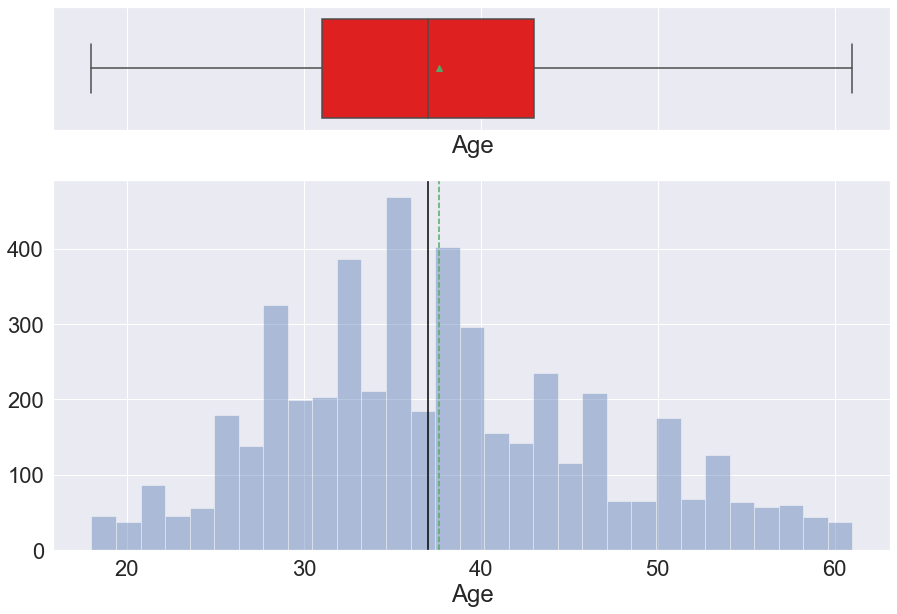

In [22]:
histogram_boxplot(data["Age"])

* The average age of the customer according to data is around 37, highest is 60+ and lowest is 18

In [23]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

#### Observations on OwnCar

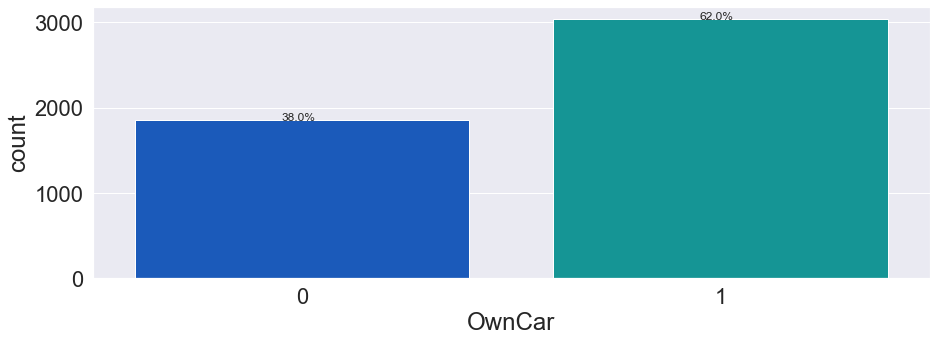

In [24]:
# using count plot to visualize the total no of males and females in data
plt.figure(figsize=(15,5))
ax = sns.countplot(data["OwnCar"],palette='winter')
perc_on_bar(ax,data["OwnCar"])

* From the given dataset 38% customers dont own a car and 62% customers owns a car

#### Observations on ProdTaken

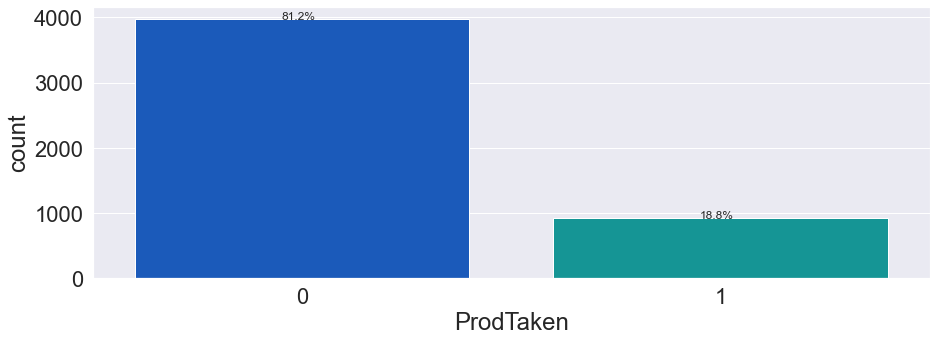

In [25]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["ProdTaken"],palette='winter')
perc_on_bar(ax,data["ProdTaken"])

* Only 18.8% of the customers purchased the package so far

#### Observations on Gender

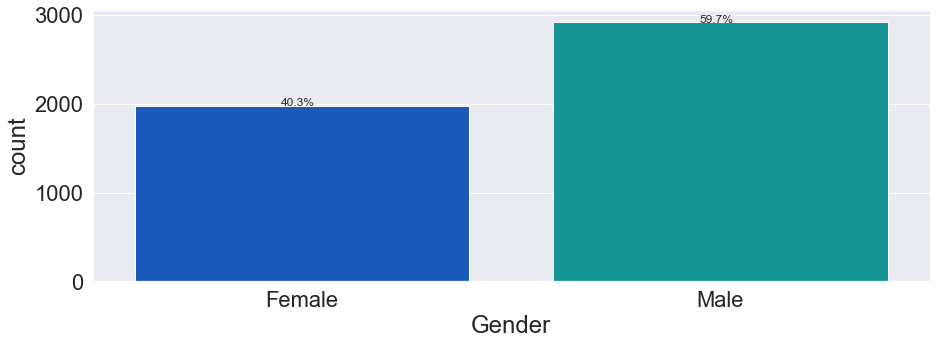

In [26]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Gender"],palette='winter')
perc_on_bar(ax,data["Gender"])

* So approximately 60% of customers are males

#### Observations on Type of Contact

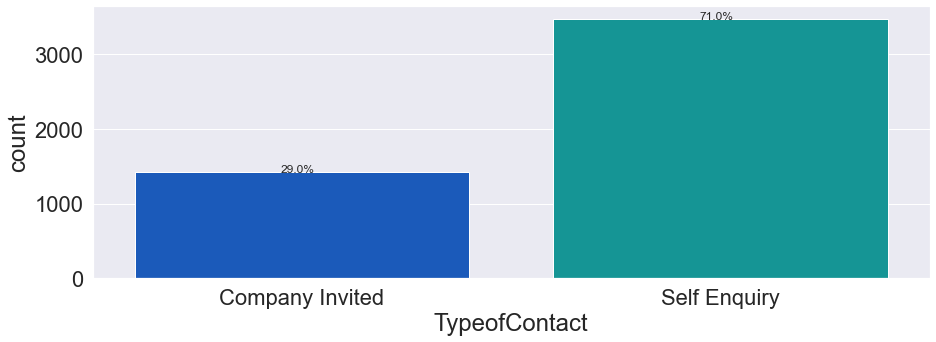

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["TypeofContact"],palette='winter')
perc_on_bar(ax,data["TypeofContact"])

* Almost 71% of customers are approched company by Self enquiry, only 29% are invited or contacted by company.

#### Observations on CityTier

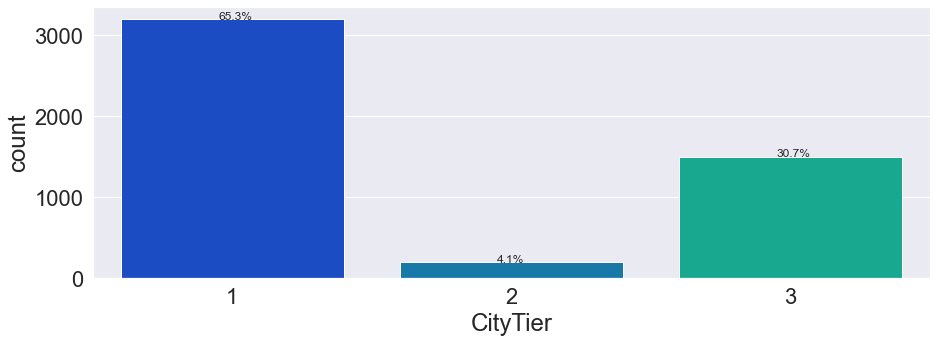

In [28]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["CityTier"],palette='winter')
perc_on_bar(ax,data["CityTier"])

* Highest customers are from Tier1 city and lowest from Tier2 City

#### Observation on Customer Occupation

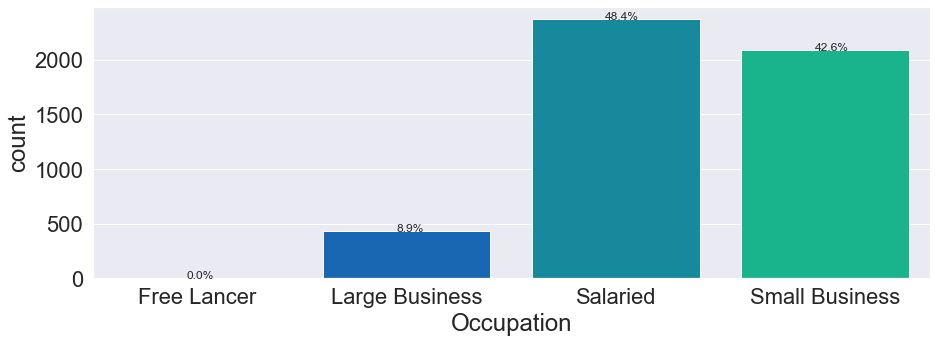

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Occupation"],palette='winter')
perc_on_bar(ax,data["Occupation"])

* 90% of customers are coming from only two occupations either salaries or small business people.

#### Observations on Designation

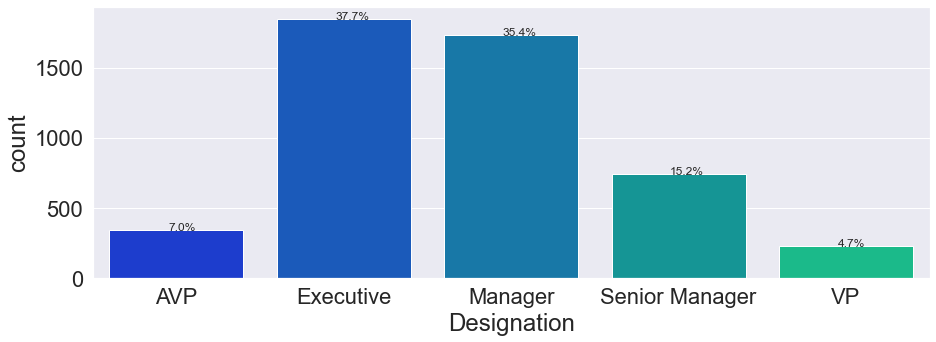

In [30]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Designation"],palette='winter')
perc_on_bar(ax,data["Designation"])

* Executive and Manager Designation are very close and they both  contains about 70% of customers data.

#### Observation on Customer passport

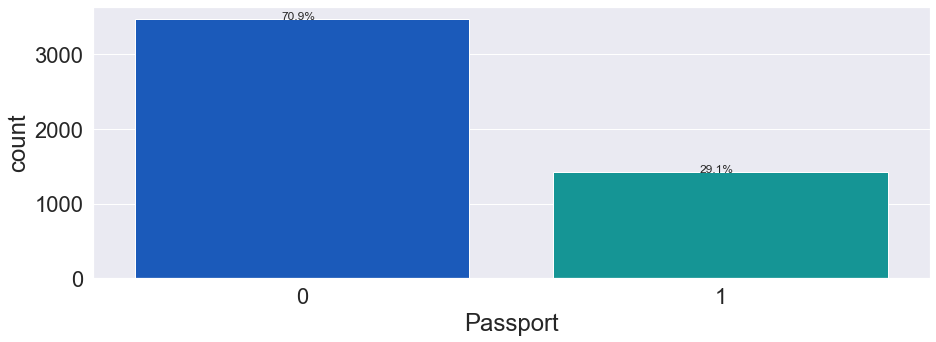

In [31]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Passport"],palette='winter')
perc_on_bar(ax,data["Passport"])

* Only 29% of the data are having passports.

#### Observations on NumberOfTrips

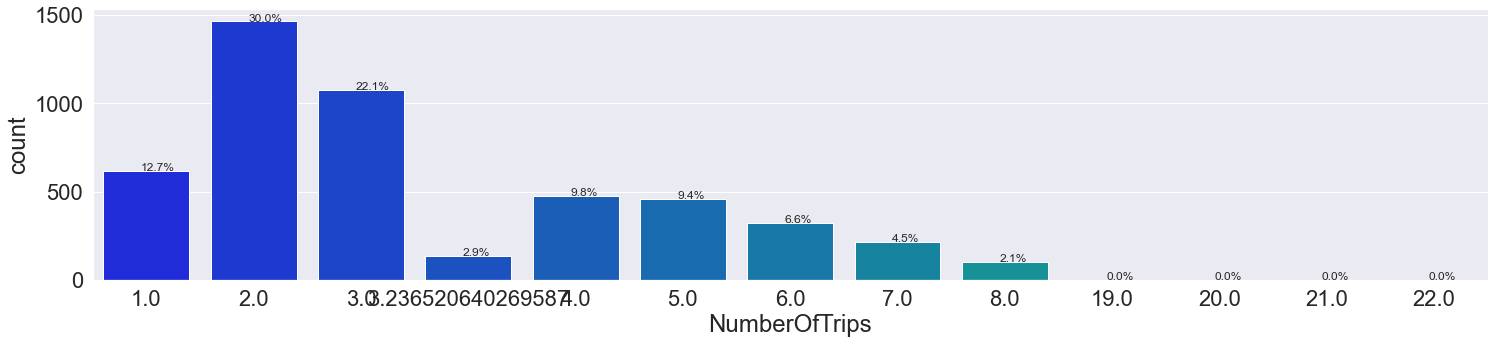

In [32]:
plt.figure(figsize=(25,5))
ax = sns.countplot(data["NumberOfTrips"],palette='winter')
perc_on_bar(ax,data["NumberOfTrips"])

* Highest percent of customers in the dataset are having 2 trips per year.

#### Observations on MaritalStatus

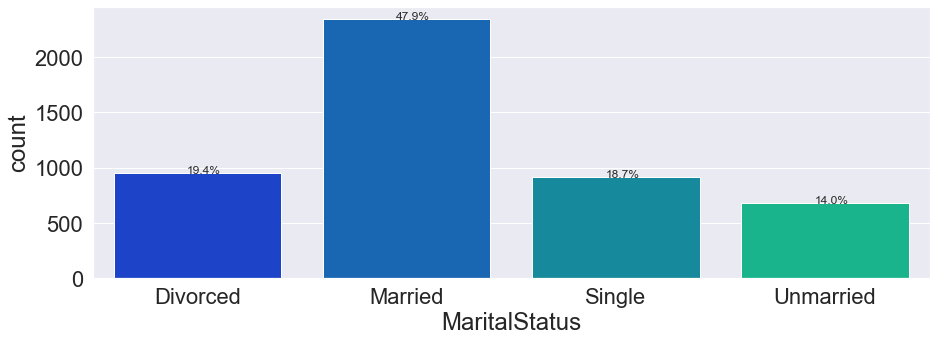

In [33]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["MaritalStatus"],palette='winter')
perc_on_bar(ax,data["MaritalStatus"])

* Marries people/couples are more likely to travel or enquireing about the travel.
* Where single/divorced people are closely equal
* Unmarried customers are with low percentage.

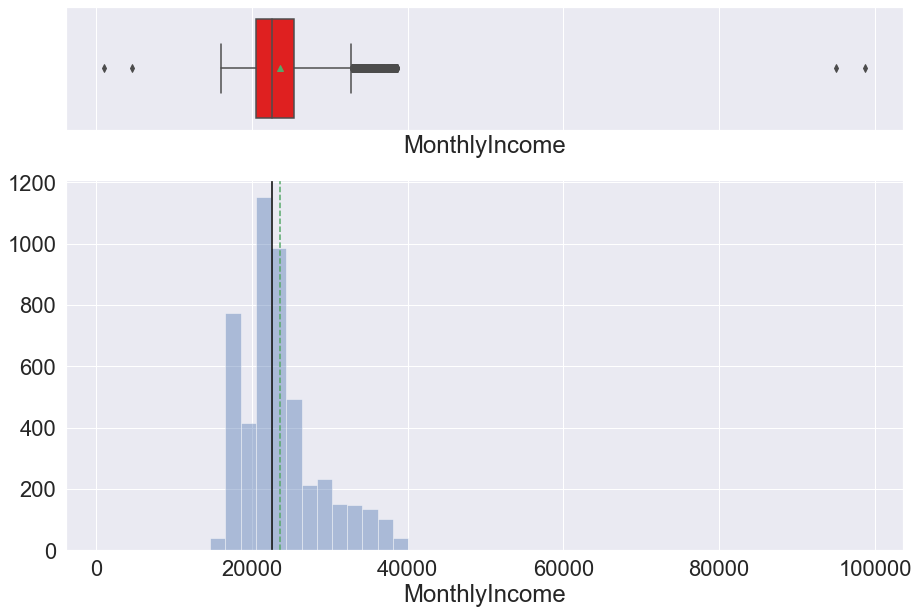

In [34]:
histogram_boxplot(data["MonthlyIncome"])

* Monthly Income data looks like 75% of data lies below 40000
* So the data here is right skewed, which shows there are outliers in the data.
* The average monthly income of the customers are 23000

#### Observation on NumberOfChildrenVisiting

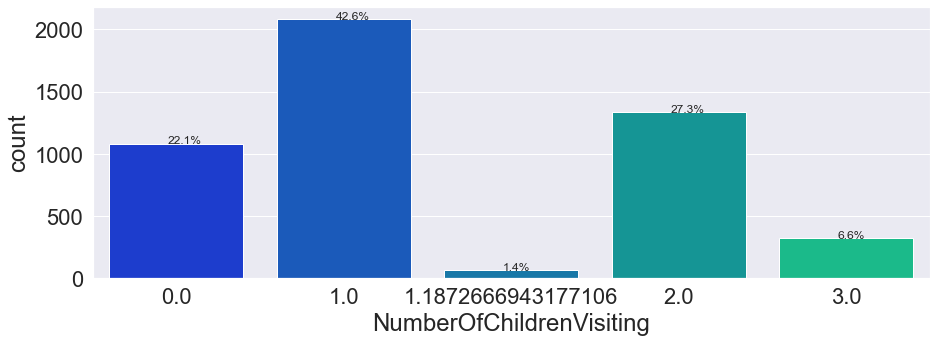

In [35]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["NumberOfChildrenVisiting"],palette='winter')
perc_on_bar(ax,data["NumberOfChildrenVisiting"])

* Majority of customer are with only one child.

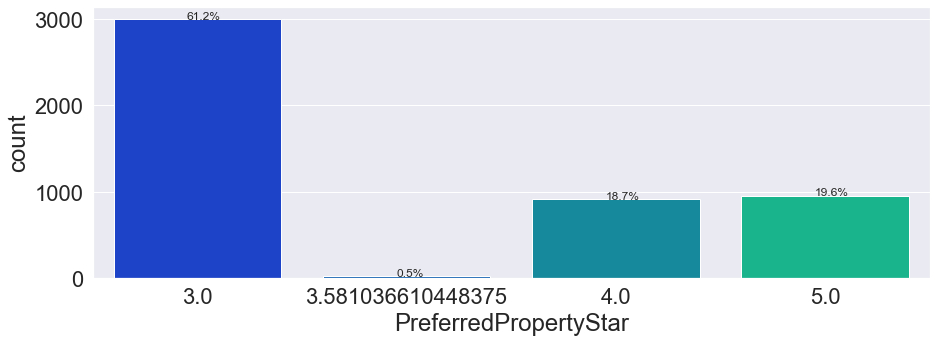

In [36]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["PreferredPropertyStar"],palette='winter')
perc_on_bar(ax,data["PreferredPropertyStar"])

* Approximately 62% of customers rated 3 ratingto the prefferred hotl property.

#### Observation on NumberofPersonVisiting

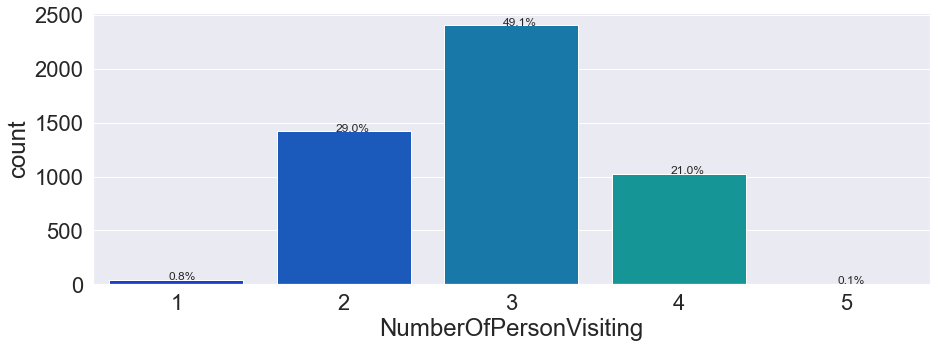

In [37]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["NumberOfPersonVisiting"],palette='winter')
perc_on_bar(ax,data["NumberOfPersonVisiting"])

* 49% of data having NumberofPersonvisiting is 3.
* 29% of data are NumberofPersonvisiting is 2
* 21% of data are NumberofPersonVisiting is 4.


#### Observation on NumberOfFollowups

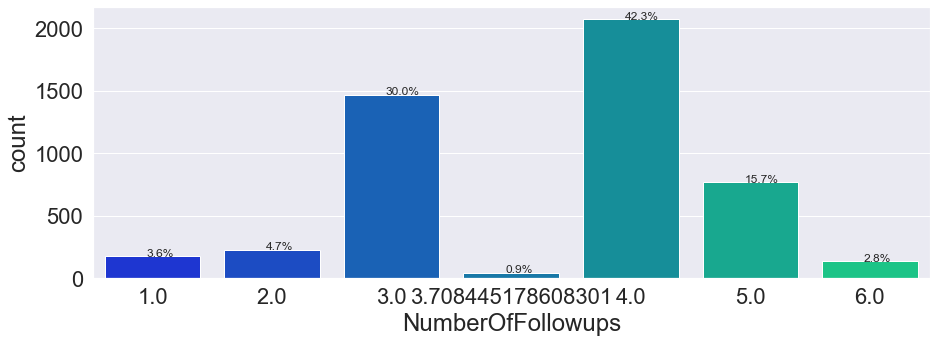

In [38]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["NumberOfFollowups"],palette='winter')
perc_on_bar(ax,data["NumberOfFollowups"])

* This data shows the stats of customers where the company made no of followups.
* Highest is customers where no of followups made is 4, following by 3 with 30%

### BiVariate Analysis

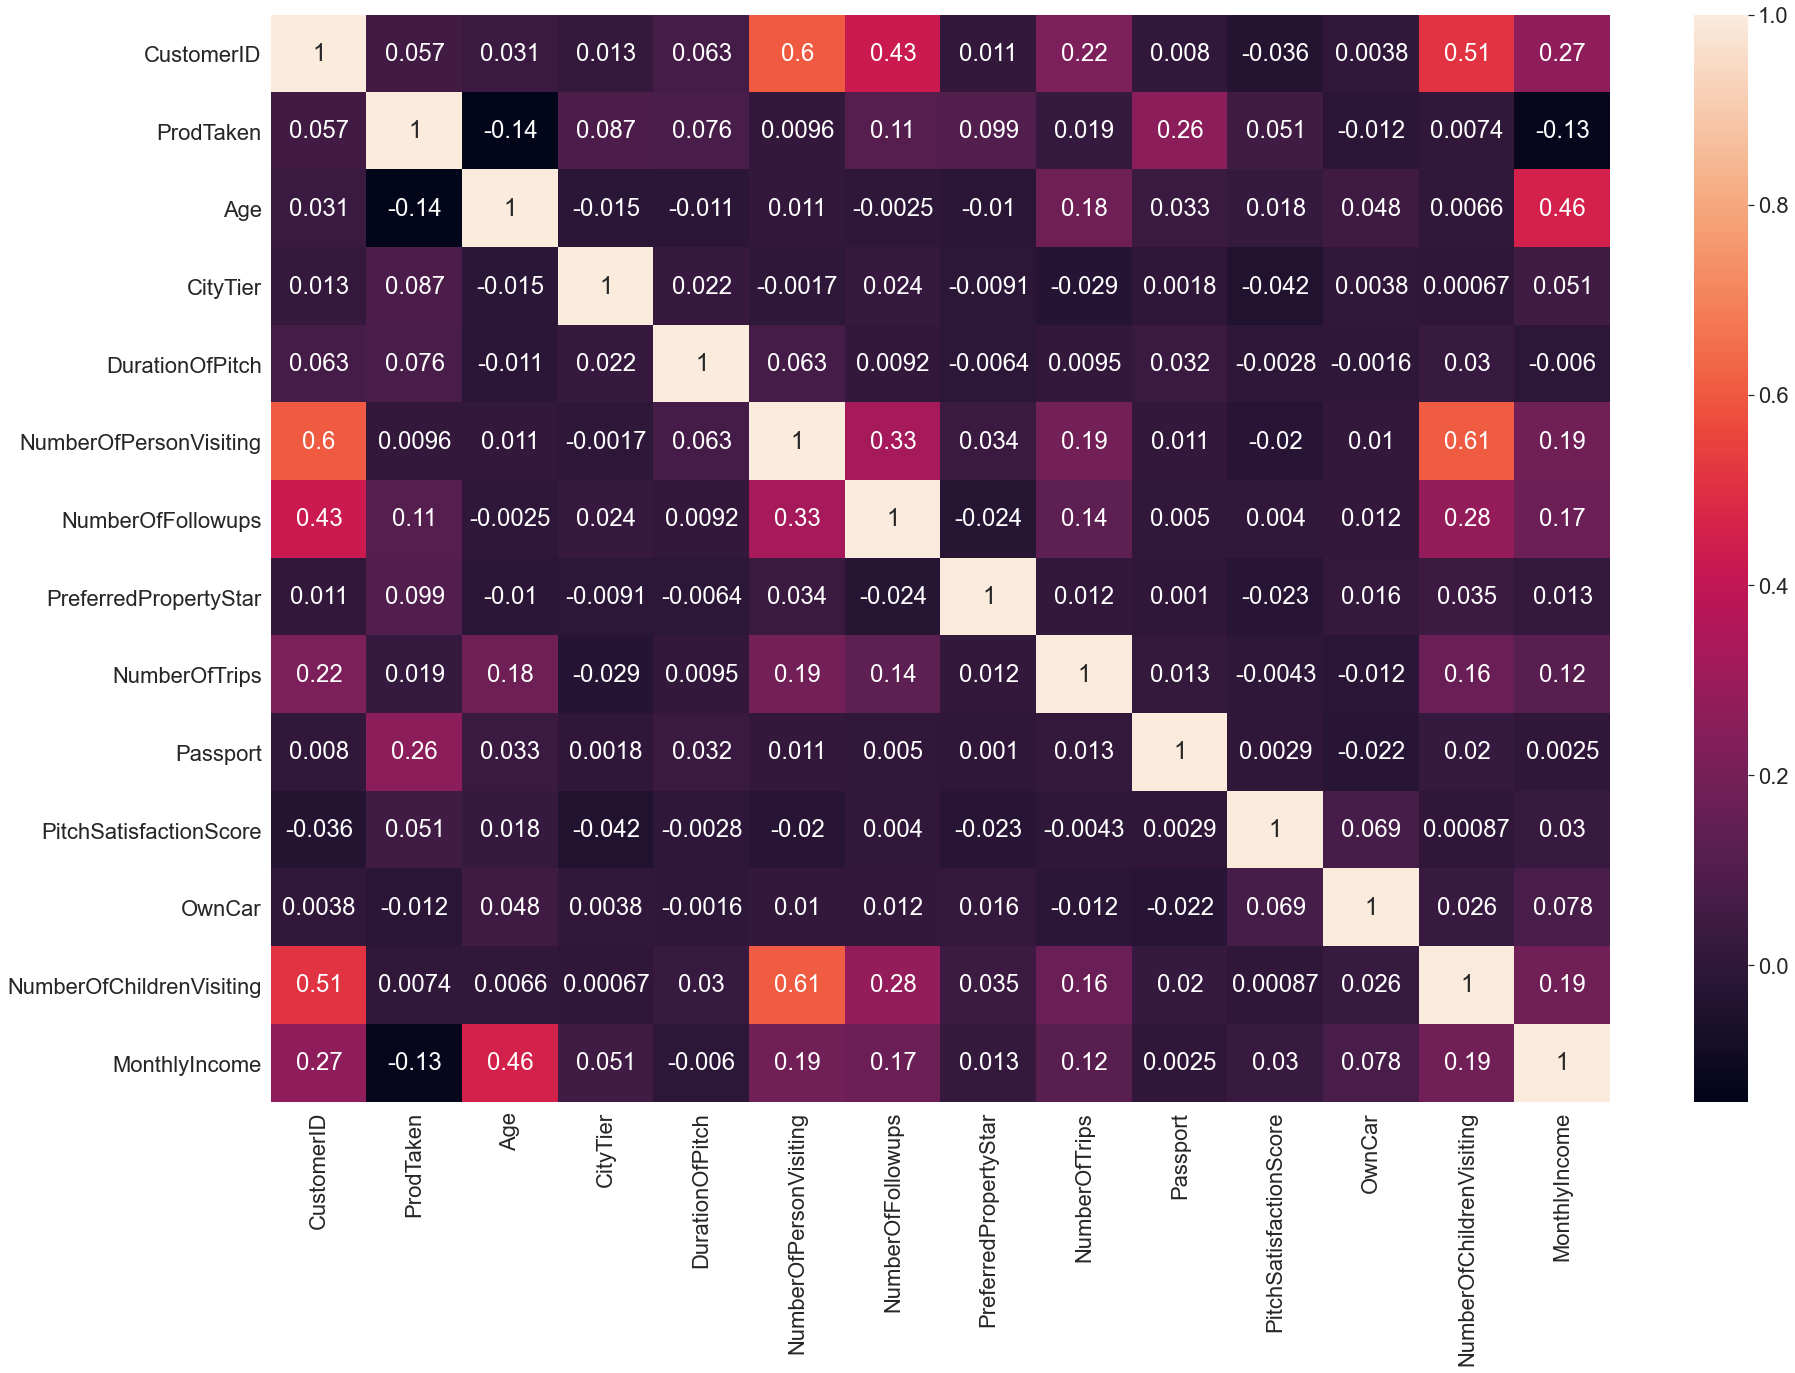

In [39]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [103]:
data.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.143717,0.086852,0.076297,0.009627,0.111675,0.099265,0.018739,0.260844,0.051394,-0.011508,0.007388,-0.128092
Age,-0.143717,1.000000,-0.015344,-0.011280,0.011298,-0.002477,-0.010130,0.175526,0.032602,0.018055,0.047525,0.006617,0.456273
CityTier,0.086852,-0.015344,1.000000,0.022020,-0.001671,0.023524,-0.009145,-0.029352,0.001793,-0.042160,0.003817,0.000668,0.050644
DurationOfPitch,0.076297,-0.011280,0.022020,1.000000,0.063310,0.009197,-0.006448,0.009470,0.032245,-0.002810,-0.001585,0.030349,-0.006004
NumberOfPersonVisiting,0.009627,0.011298,-0.001671,0.063310,1.000000,0.326649,0.033749,0.192513,0.011177,-0.019581,0.010362,0.607215,0.189278
NumberOfFollowups,0.111675,-0.002477,0.023524,0.009197,0.326649,1.000000,-0.023957,0.137420,0.004951,0.004035,0.012057,0.283545,0.172591
PreferredPropertyStar,0.099265,-0.010130,-0.009145,-0.006448,0.033749,-0.023957,1.000000,0.011880,0.001038,-0.022635,0.015712,0.035378,0.013432
NumberOfTrips,0.018739,0.175526,-0.029352,0.009470,0.192513,0.137420,0.011880,1.000000,0.012769,-0.004307,-0.011666,0.164996,0.120758
Passport,0.260844,0.032602,0.001793,0.032245,0.011177,0.004951,0.001038,0.012769,1.000000,0.002926,-0.022330,0.020132,0.002488
PitchSatisfactionScore,0.051394,0.018055,-0.042160,-0.002810,-0.019581,0.004035,-0.022635,-0.004307,0.002926,1.000000,0.068850,0.000872,0.029701


* NumberOfPersonVisiting is highly correlated with NumberOfChildrenVisiting which means number of person visiting must have children atleast one or two.
* Customer ID is highly correlated with NoOfPersonVisiting and NoofChildrensVisiting.
* Age is correlated with MonthlyIncome with 0.46, so lets see how important this variables are.

### Age vs Monthly Income vs ProdTaken

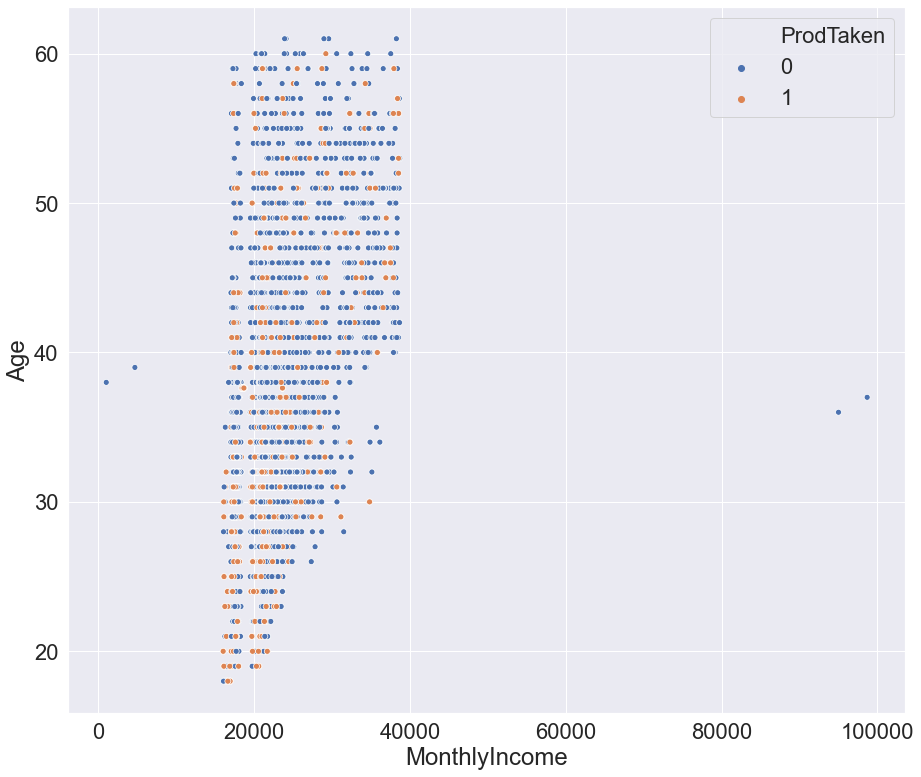

In [40]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Age', x='MonthlyIncome', hue='ProdTaken', data=data);

#### Duration of Pitch vs NumberofPersonVisiting

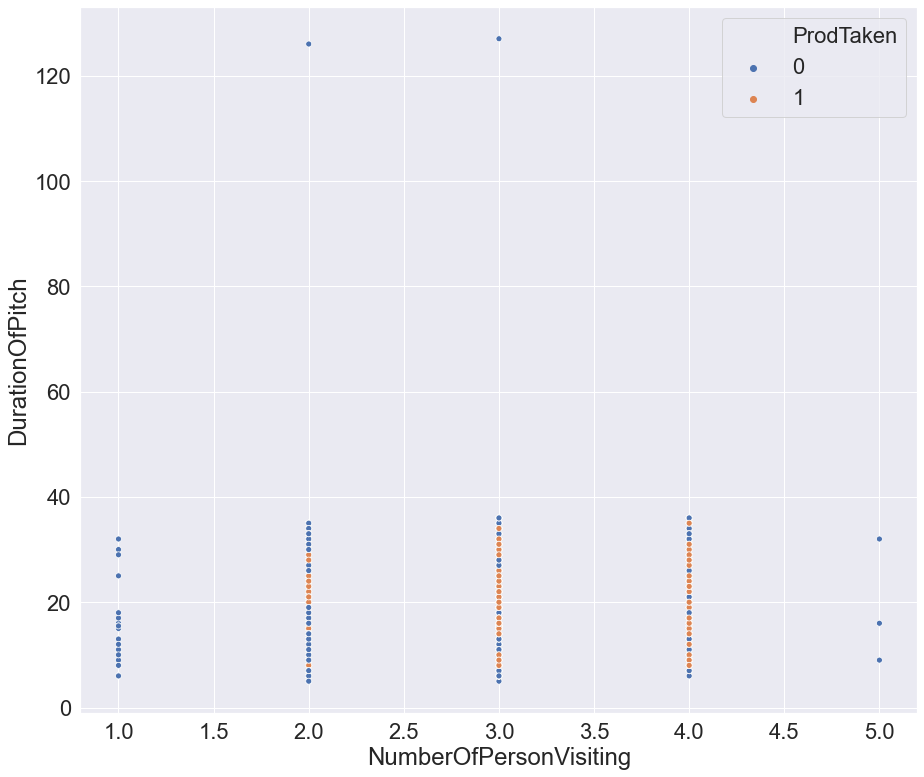

In [105]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='DurationOfPitch', x='NumberOfPersonVisiting', hue='ProdTaken', data=data);

#### Designation vs Age

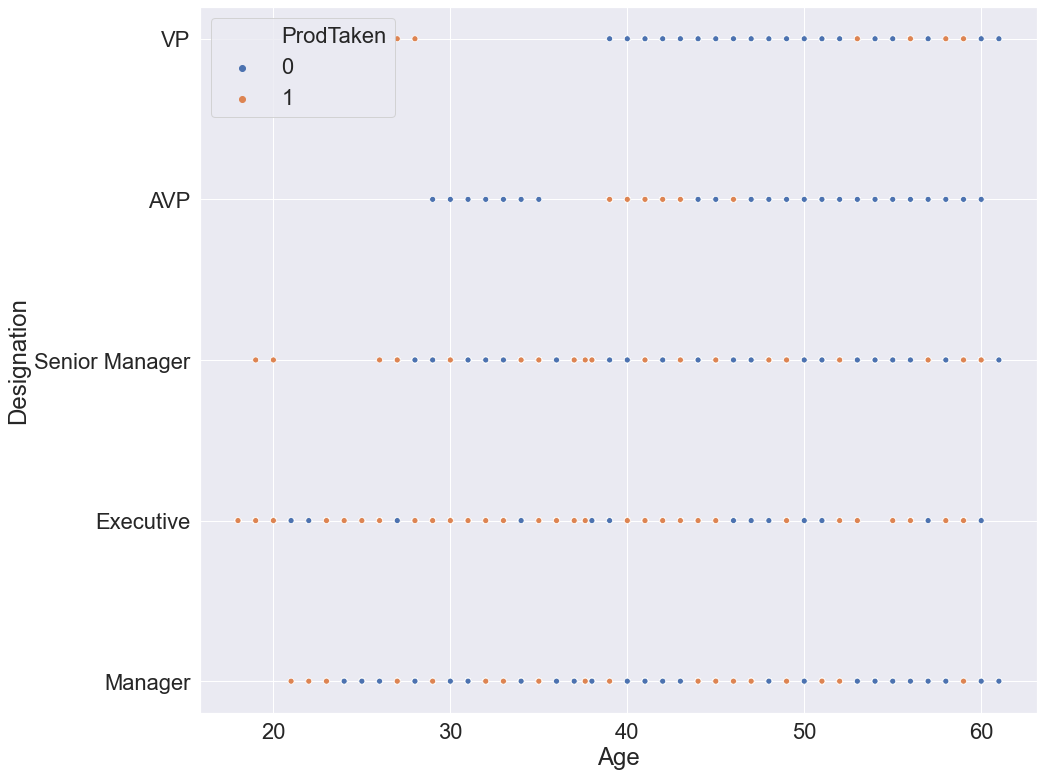

In [42]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Designation', x='Age', hue='ProdTaken', data=data);

#### NumberofTrips vs Age

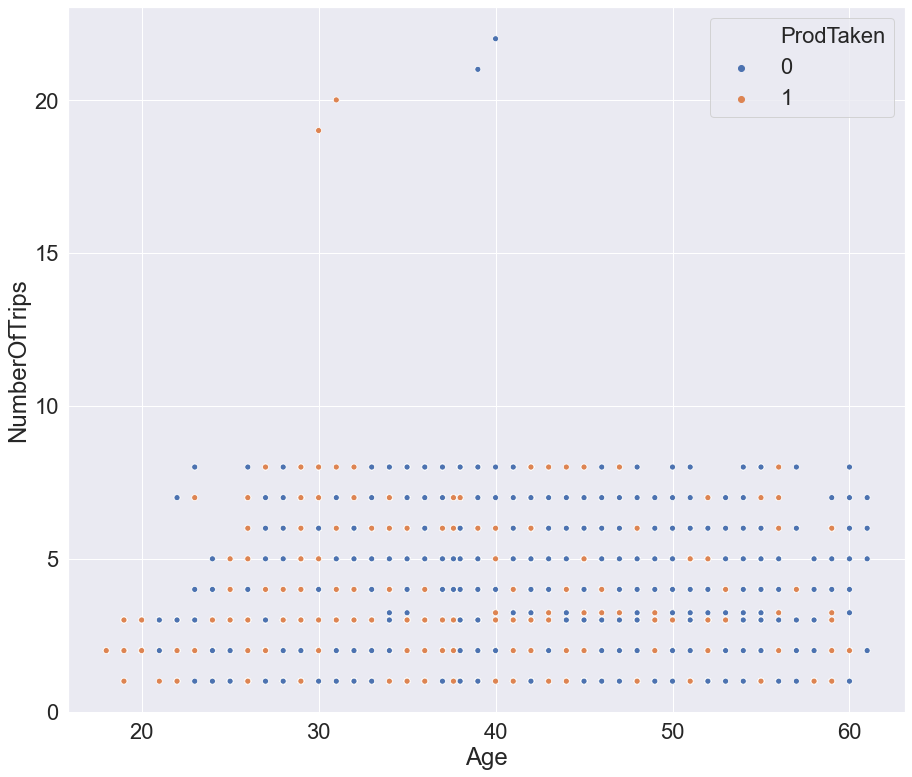

In [43]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='NumberOfTrips', x='Age', hue='ProdTaken', data=data);

#### MAritalStatus vs NumberofTrips

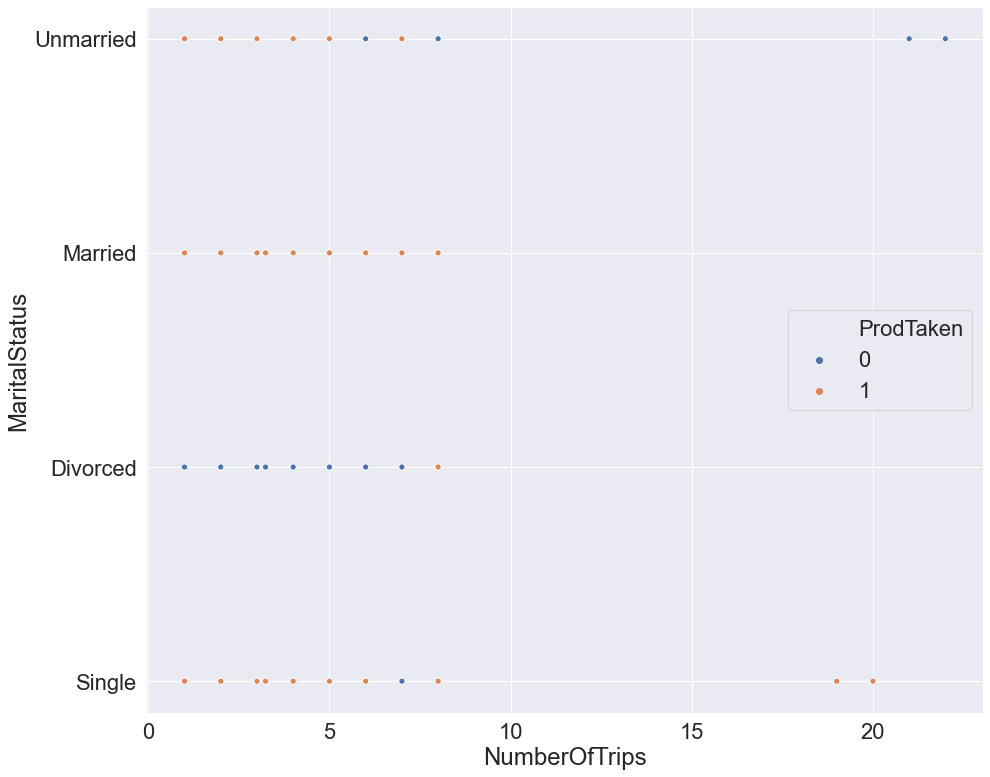

In [44]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='MaritalStatus', x='NumberOfTrips', hue='ProdTaken', data=data);

## Data preprocessing, Feature engineering

In [45]:
#Dropping columns
data.drop(['CustomerID'], axis =1, inplace=True)

In [46]:
df = data.copy()

In [47]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [48]:
oneHotCols=["TypeofContact","Occupation","Gender","MaritalStatus","Designation","ProductPitched"]

In [49]:
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,1,0,0,0,1,0,0,0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,...,0,0,1,0,0,0,1,0,0,0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,...,0,1,0,0,0,1,0,0,0,0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,...,0,1,0,0,0,1,0,0,0,0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,...,0,1,0,0,0,1,0,0,0,0
5,0,32.000000,1,8.0,3,3.0,3.0,1.0,0,5,...,0,1,0,0,0,1,0,0,0,0
6,0,59.000000,1,9.0,2,2.0,5.0,5.0,1,2,...,0,1,0,0,0,1,0,0,0,0
7,0,30.000000,1,30.0,3,3.0,3.0,2.0,0,2,...,0,1,0,0,0,1,0,0,0,0
8,0,38.000000,1,29.0,2,4.0,3.0,1.0,0,3,...,0,0,0,1,0,0,0,0,1,0
9,0,36.000000,1,33.0,3,3.0,3.0,7.0,0,3,...,0,0,1,0,0,0,1,0,0,0


## Split the data

In [50]:
# Separating features and the target column
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [51]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(3421, 34) (1467, 34)


**The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [52]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [53]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

**Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [54]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [55]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Building the model
- We are going to build 2 ensemble models here - Bagging Classifier and Random Forest Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

### Bagging Classifier

In [56]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [57]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.9100204498977505
Recall on training set :  0.9720496894409938
Recall on test set :  0.6014492753623188
Precision on training set :  0.9984051036682615
Precision on test set :  0.8829787234042553


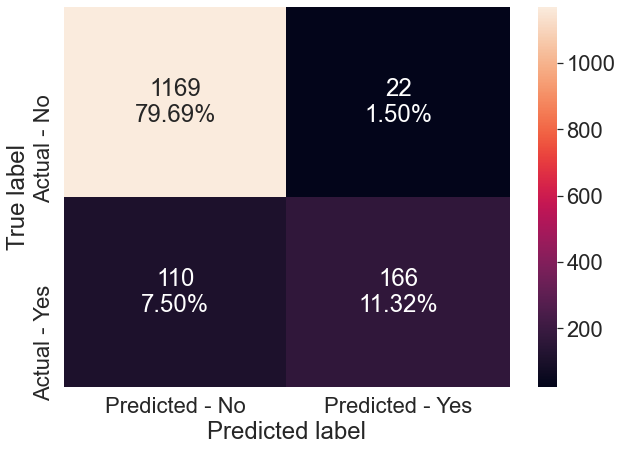

In [58]:
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [59]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [60]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.918200408997955
Recall on training set :  1.0
Recall on test set :  0.605072463768116
Precision on training set :  1.0
Precision on test set :  0.9382022471910112


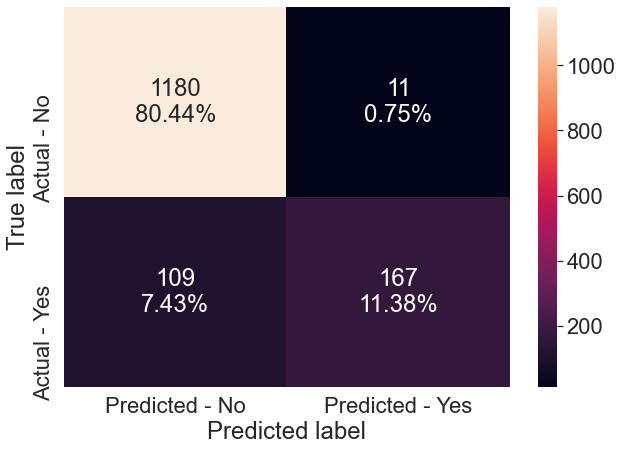

In [61]:
make_confusion_matrix(rf_estimator,y_test)

**With default parameters:**

- Both models - Bagging classifiers as well as random forest classifier are overfitting the train data.
- Both models are giving similar performance in terms of accuracy but bagging classifier is giving better recall.

## Hyperparameter Tuning

### Bagging Classifier

**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [62]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

**Let's check different metrics for bagging classifier with best hyperparameters and build a confusion matrix.**

In [63]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9195637355146558
Recall on training set :  0.9968944099378882
Recall on test set :  0.6376811594202898
Precision on training set :  1.0
Precision on test set :  0.9072164948453608


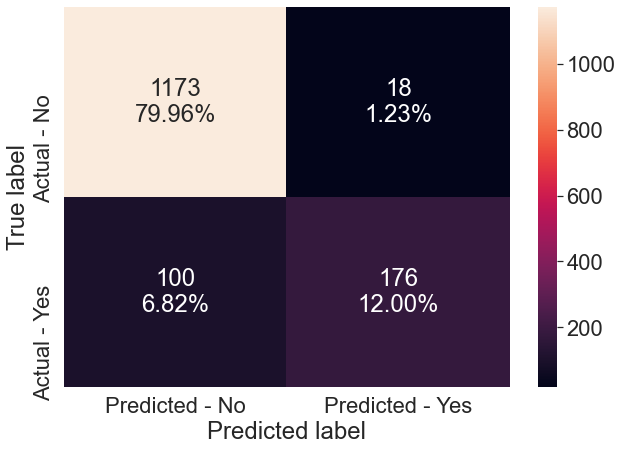

In [64]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

### Insights
- We can see that train accuracy and recall for the bagging classifier have increased slightly after hyperparameter tuning but the test recall has decreased.
- The model is overfitting the data, as train accuracy and recall are much higher than the test accuracy and test recall.

### Let's try using logistic regression as the base estimator for bagging classifier:
- Now, let's try and change the `base_estimator` of the bagging classifier, which is a decision tree by default.
- We will pass the logistic regression as the base estimator for bagging classifier.

In [65]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

In [66]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8377667348728441
Accuracy on test set :  0.8295841854124063
Recall on training set :  0.20186335403726707
Recall on test set :  0.18115942028985507
Precision on training set :  0.7602339181286549
Precision on test set :  0.6756756756756757


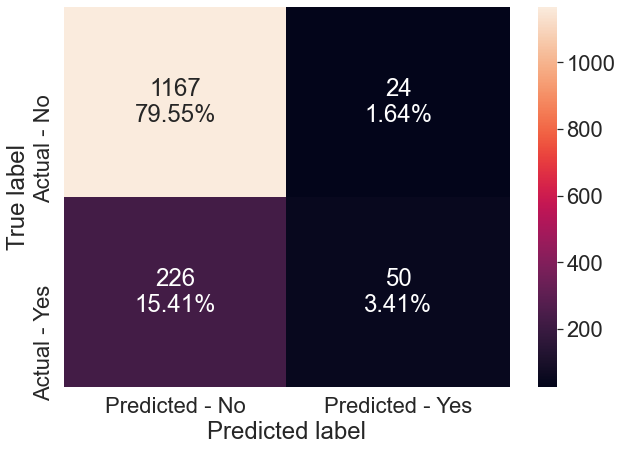

In [67]:
make_confusion_matrix(bagging_lr,y_test)

### Random Forest Classifier
**Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:**

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.

In [68]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [69]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9087985969014908
Accuracy on test set :  0.8718473074301295
Recall on training set :  0.5450310559006211
Recall on test set :  0.4166666666666667
Precision on training set :  0.9486486486486486
Precision on test set :  0.8098591549295775


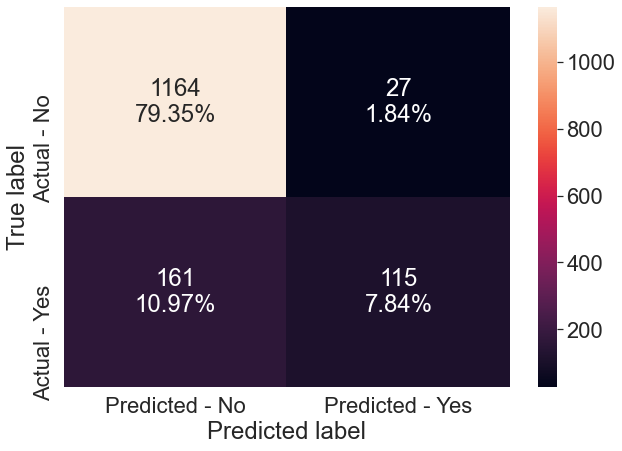

In [70]:
make_confusion_matrix(rf_estimator_tuned,y_test)

### Insights
- We can see that random forest's performance has increased as compared to the random forest model with default parameters.
- Model is slightly overfitting the data but not as much as the tuned bagging classifier.


### Let's try using class_weights for random forest:
- The model performance is not very good. This may be due to the fact that the classes are imbalanced with 70% non-defaulters and 30% defaulters. 

- We should make the model aware that the class of interest here is 'defaulters'.

- We can do so by passing the parameter `class_weights` available for random forest. This parameter is not available for the bagging classifier.

- class_weight specifies the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

- We can choose class_weights={0:0.3,1:0.7} because that is the original imbalance in our data.

In [71]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=9,
                       n_estimators=250, random_state=1)

In [72]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.893306050862321
Accuracy on test set :  0.8732106339468303
Recall on training set :  0.6506211180124224
Recall on test set :  0.5471014492753623
Precision on training set :  0.7495527728085868
Precision on test set :  0.7122641509433962


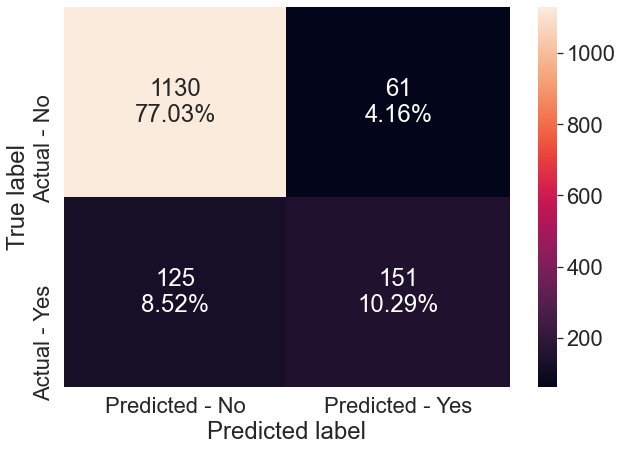

In [73]:
make_confusion_matrix(rf_estimator_weighted,y_test)

### Checking the feature importance

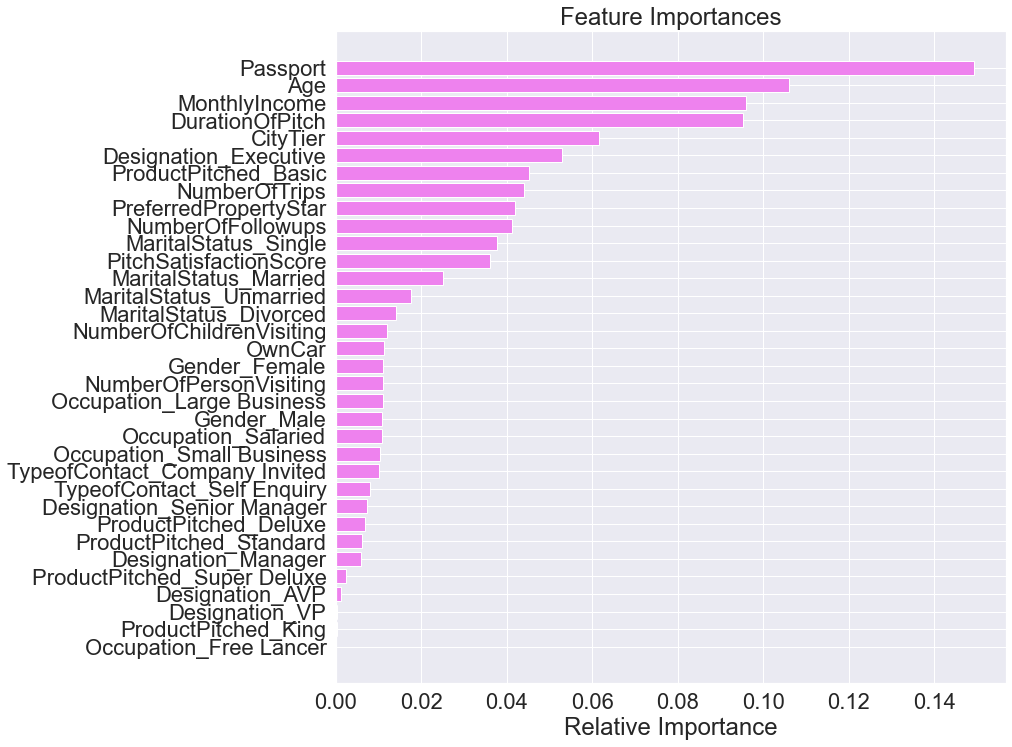

In [74]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Passport, Age, Monthly Income, Duration of pitch, City Tier, Designation_Executive are top 5 important features.

### Comparing all models

In [75]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [76]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.99,0.91,0.97,0.60,1.00,0.88
1,Tuned Bagging Classifier,1.00,0.92,1.00,0.64,1.00,0.91
2,Bagging classifier with base_estimator=LR,0.84,0.83,0.20,0.18,0.76,0.68
3,Random Forest with deafult parameters,1.00,0.92,1.00,0.61,1.00,0.94
4,Tuned Random Forest Classifier,0.91,0.87,0.55,0.42,0.95,0.81
5,Random Forest with class_weights,0.89,0.87,0.65,0.55,0.75,0.71


### Note:
- Hyperparameter tuning is tricky and exhaustive in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model until you try those hyperparameters.
- The final results depend on the parameters used/checked using GridSearchCV.
- There may be yet better parameters which may result in a better accuracy and recall

## Boosting

### AdaBoost Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

In [79]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [80]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8456591639871383
Accuracy on test set :  0.8520790729379687
Recall on training set :  0.3105590062111801
Recall on test set :  0.3188405797101449
Precision on training set :  0.704225352112676
Precision on test set :  0.7521367521367521


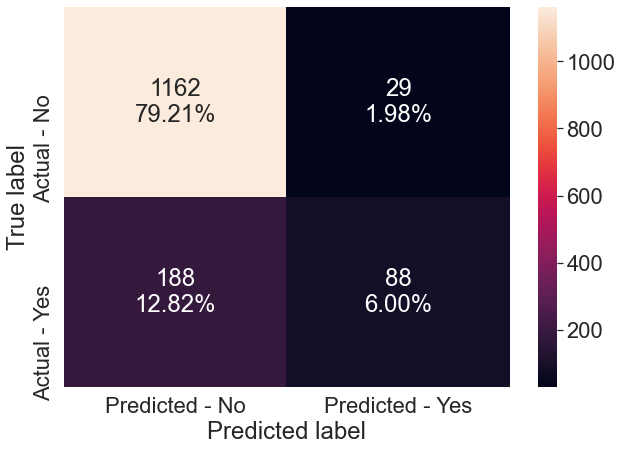

In [81]:
make_confusion_matrix(abc,y_test)

### Gradient Boosting Classifier

In [82]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [83]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8857059339374452
Accuracy on test set :  0.8732106339468303
Recall on training set :  0.45962732919254656
Recall on test set :  0.42028985507246375
Precision on training set :  0.8731563421828908
Precision on test set :  0.8169014084507042


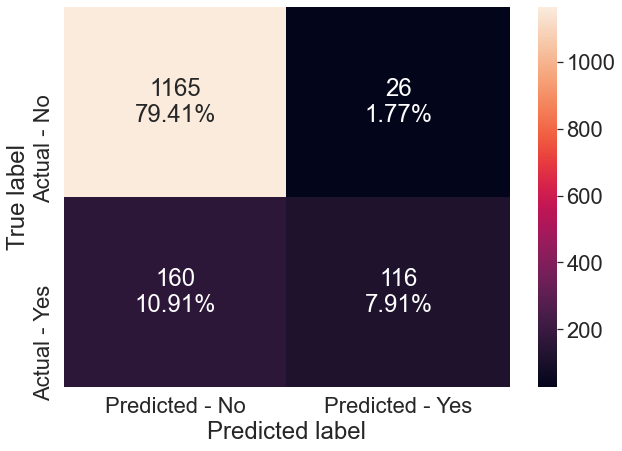

In [84]:
make_confusion_matrix(gbc,y_test)

### XGBoost Classifier

In [86]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[23:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9216087252897068
Recall on training set :  0.9968944099378882
Recall on test set :  0.6739130434782609
Precision on training set :  1.0
Precision on test set :  0.8815165876777251


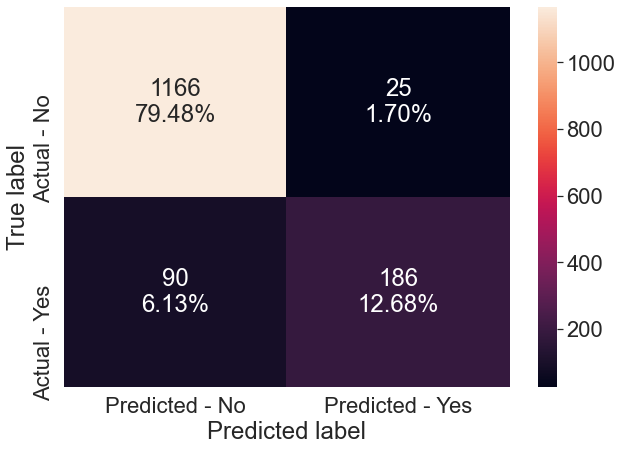

In [88]:
make_confusion_matrix(xgb,y_test)

**With default parameters:**
- XGBoost classifier has better test accuracy among these 3 models.
- Adaboost classifier has least test accuracy and test recall.

## Hyperparameter Tuning

### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [89]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.5000000000000002, n_estimators=90,
                   random_state=1)

In [90]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9807073954983923
Accuracy on test set :  0.8513974096796183
Recall on training set :  0.9285714285714286
Recall on test set :  0.605072463768116
Precision on training set :  0.9676375404530745
Precision on test set :  0.605072463768116


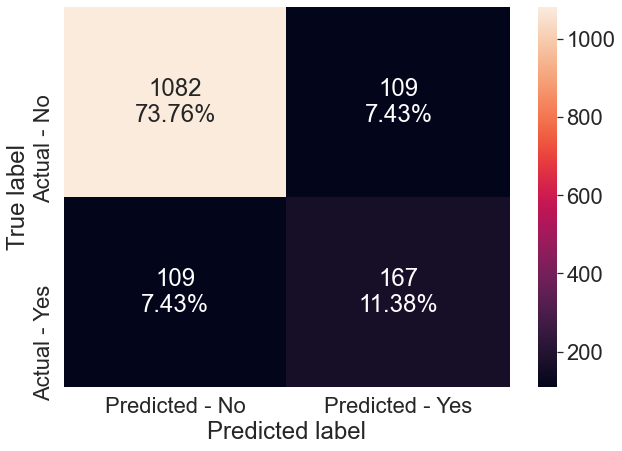

In [91]:
make_confusion_matrix(abc_tuned,y_test)

### Insights
- The model is overfitting the train data as train accuracy is much higher than the test accuracy.
- The model has low test recall. This implies that the model is not good at identifying defaulters.

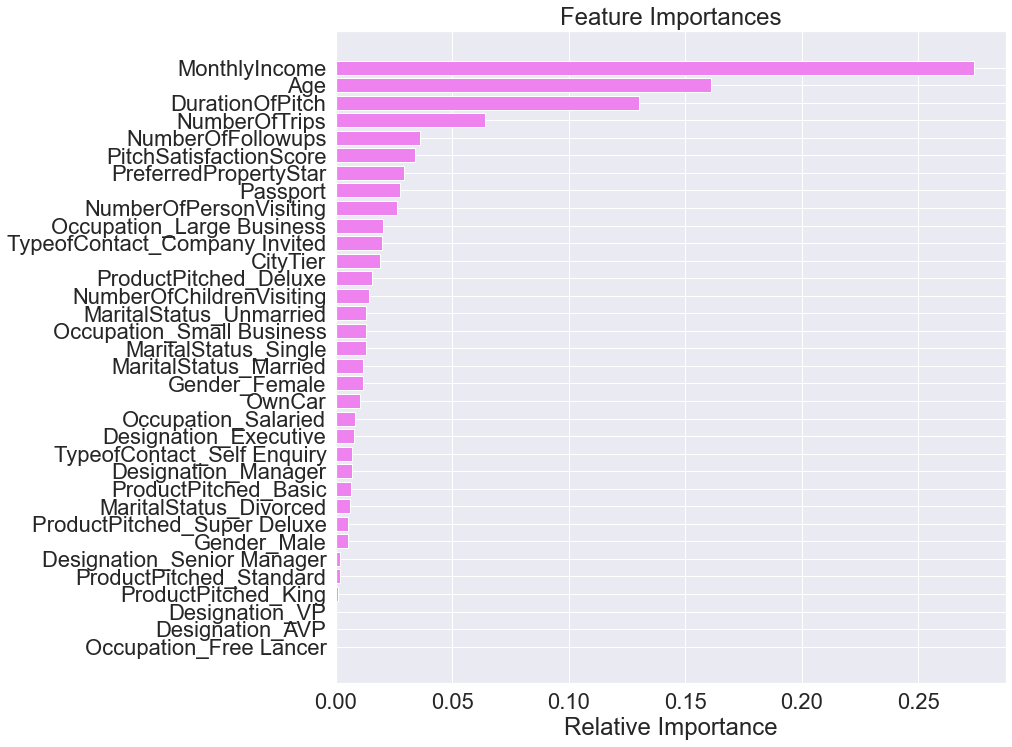

In [92]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* MonthlyIncome and Age is the most important feature as per tuned Adaboost model.

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [93]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [94]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8886290558316282
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.45962732919254656
Recall on test set :  0.3804347826086957
Precision on training set :  0.8996960486322189
Precision on test set :  0.8015267175572519


In [95]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

In [96]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9204910844782227
Accuracy on test set :  0.8834355828220859
Recall on training set :  0.6211180124223602
Recall on test set :  0.4891304347826087
Precision on training set :  0.9345794392523364
Precision on test set :  0.8181818181818182


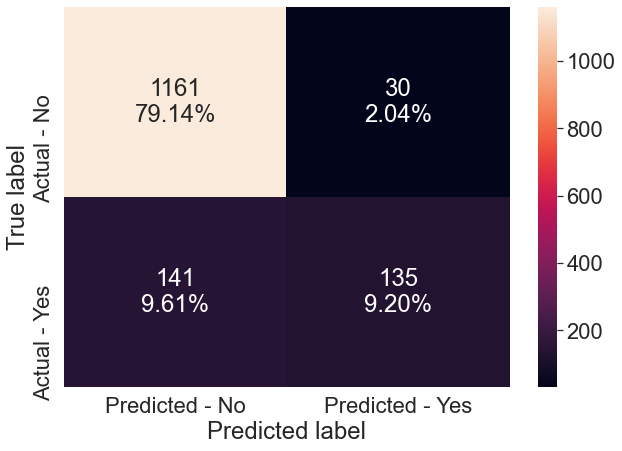

In [97]:
make_confusion_matrix(gbc_tuned,y_test)

### Insights
- The model performace has not increased by much.


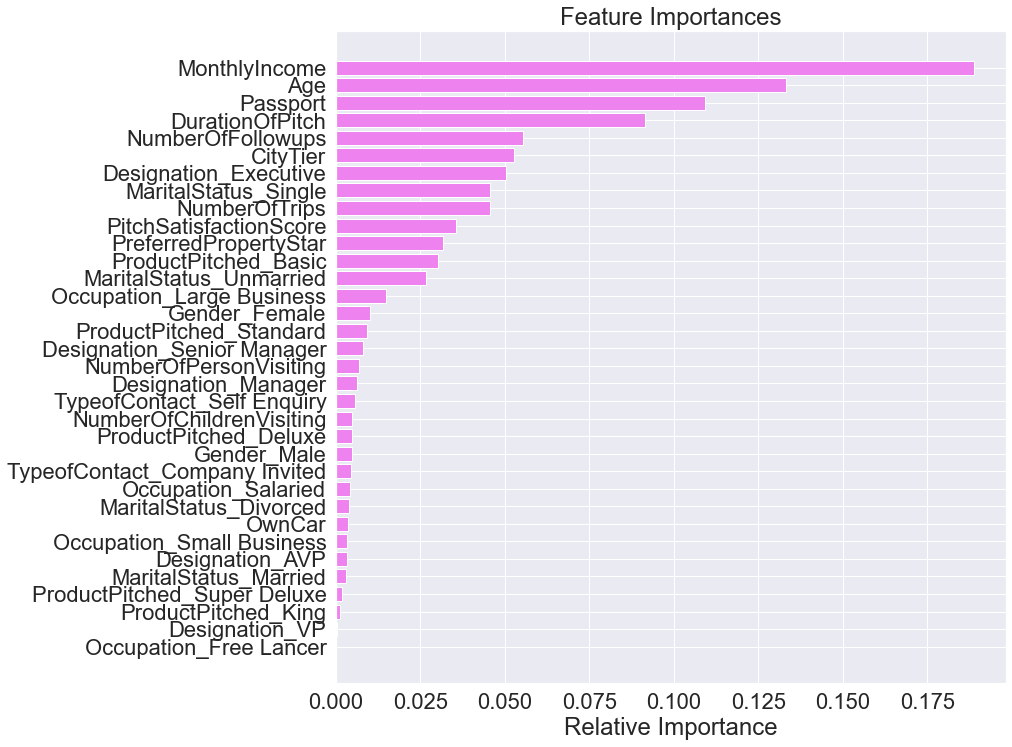

In [98]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Monthly Income, Age and Passport are main important features

## Comparing all models

In [101]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [102]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.85,0.85,0.31,0.32,0.70,0.75
1,AdaBoost Tuned,0.98,0.85,0.93,0.61,0.97,0.61
2,Gradient Boosting with default parameters,0.89,0.87,0.46,0.42,0.87,0.82
3,Gradient Boosting with init=AdaBoost,0.89,0.87,0.46,0.38,0.90,0.80
4,Gradient Boosting Tuned,0.92,0.88,0.62,0.49,0.93,0.82
5,XGBoost with default parameters,1.00,0.92,1.00,0.67,1.00,0.88


## Actionable Insights & Recommendations

* We can see most of our models are overfitting for training set.
* But in Everymodel we see Age, MonthlyIncome, Passport, Duration of Pitch, No of Followups, Desination, Marital Status, No of trips, City Tier are main important features of customers
* So business should focus on this features in customers data before contacting them to avoid marketing cost.
